Lena Siemer & Jonas Neuschäfer
# LINEAR LEAST SQUARES AND $k$-NEAREST NEIGHBORS
## 1.1 DATA ANALYSIS BASICS
Task 1.0

(d) Create a jupyter-notebook in which you create an array $z$ consisting of 10000 random numbers drawn from $\{0, 1, 2\}$. Implement two versions of a function which counts the number of appearances of the subsequence $(2, 0, 1)$ in $z$. The first version should work with a loop that accesses the array z elementwise and makes elementwise comparisons. The second version should be a vectorized one (Hint: The numpy function `logical_and` might help you), which operates on (almost) the whole array $z$. Compare the runtime of the two versions.

In [1]:
import numpy as np
import time

# create array z with 10,000 random numbers from {0, 1, 2}
np.random.seed(42)
z = np.random.randint(0, 3, 10000)

# elementwise
def subseqcounter1(array = None):
  appearances = 0
  for i in range(len(array) - 2):
    if (array[i], array[i+1], array[i+2]) == (2, 0, 1):
      appearances = appearances + 1
  return appearances

# vectorized
def subseqcounter2(array = None):
  return sum(np.logical_and(np.logical_and(array[:-2] == 2, array[1:-1] == 0), array[2:] == 1))

# compare runtimes
def runtime(function = None, array = None):
  start = time.time()
  function(array)
  return time.time() - start

print(f'Runtime of elementwise function: {runtime(subseqcounter1, z)} seconds')
print(f'Runtime of vectorized function: {runtime(subseqcounter2, z)} seconds')

Runtime of elementwise function: 0.01353907585144043 seconds
Runtime of vectorized function: 0.0069925785064697266 seconds


## 1.3 LINEAR LEAST SQAURES (LLS)
Task 1.1. Create $n = 200$ data points in the following way:

In [ ]:
n = 200

(a) Draw ten random i.i.d. samples from the two-variate normal distribution $\mathcal{N}((\frac{3}{2}, 0)^T, I)$ and store them in a numpy array $a$. Draw another ten samples according to $\mathcal{N}((0, \frac{3}{2})^T, I)$ and store them in another numpy array $b$. Use MatPlotLib to make a scatter plot (i.e. plot the points in a 2D coordinate system) of the elements in a and the elements in $b$ using different colors for the two arrays.

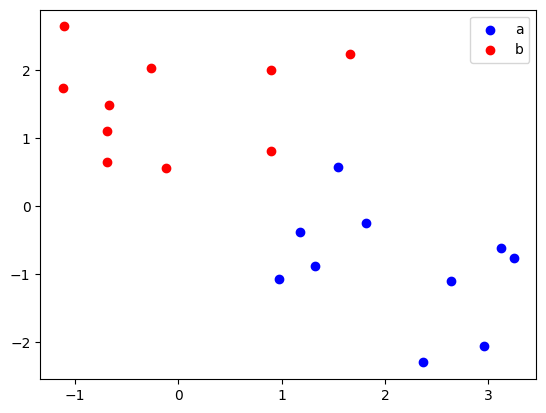

In [ ]:
import matplotlib.pyplot as plt

cov = np.eye(2)
np.random.seed(1)

# draw 10 samples from the two-variate normal distribution N(3/2, 0)^T, I)
a = np.random.multivariate_normal([3/2, 0], cov, 10)

# draw 10 samples from the two-variate normal distribution N(0, 3/2)^T, I)
b = np.random.multivariate_normal([0, 3/2], cov, 10)

# plt
plt.scatter(a[:,0], a[:, 1], color = 'b', label = 'a')
plt.scatter(b[:,0], b[:, 1], color = 'r', label = 'b')
plt.legend()
plt.show()

(b) Pick 100 equidistributed indices $i_1,\dots,i_{100}$ from $\{1, 2,\dots, 10\}$ and set the $j$-th data point $x_j$ to
$$x_j ≡ \underbrace{a[i_j]}_{i\text{-th element of }a} + ϵ_j \text{ for all } j = 1,…, 100 \text{ with } ϵ_j \sim \mathcal{N}((0, 0)^T, \frac{1}{4}I).$$
Proceed analogously for $j = 101, \dots, 200$ by substituting $a$ by $b$. Make a scatter plot for the data points $x_j$ with $j = 1, \dots, 200$ with different colors for the first 100 points and the second 100 points.

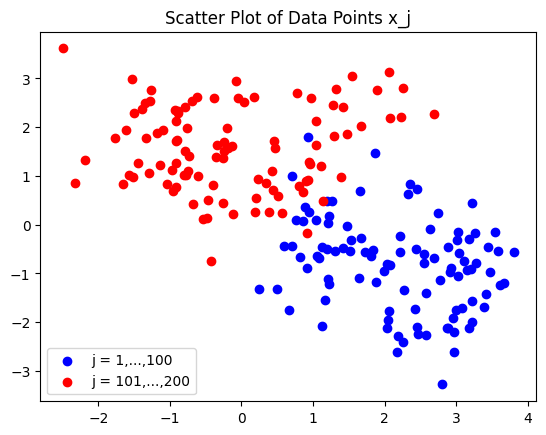

In [ ]:
def create_data_points(n = None):
  h = int(n/2)
  i = np.linspace(0, 10, h, False, dtype = int) # pick indices
  x_a = a[i] + np.random.multivariate_normal([0, 0], cov/4, h) # construct x_j for j = 1,...,n/2
  x_b = b[i] + np.random.multivariate_normal([0, 0], cov/4, h) # construct x_j for j = n/2 + 1,...,n
  return np.concatenate((x_a, x_b))

x = create_data_points(n)

#plt
plt.scatter(x[:100, 0], x[:100, 1], color = 'b', label = 'j = 1,...,100')
plt.scatter(x[100:, 0], x[100:, 1], color = 'r', label = 'j = 101,...,200')
plt.title('Scatter Plot of Data Points x_j')
plt.legend()
plt.show()

(c) The first $j = 1,\dots,100$ data points get the label $y_j = 0$, the next $j = 101,\dots, 200$ ones get $y_j = 1$.

In [ ]:
def label(n):
  h = int(n/2)
  return np.concatenate((np.zeros(h), np.ones(h)))

y = label(n)

Task 1.2  Implement a linear least squares algorithm, i.e. solve (LLS). Hint: You can use `numpy.linalg.solve` to solve a system of linear equations. Apply it to the data from task 1.1. Plot the scattered input data as in step (b) of task 1.1 together with the separating hyperplane, i.e. the contour line given by
$$α_0 + α_1x_1 + α_2x_2 = \frac{1}{2}$$
where $x_1$ and $x_2$ denote the coordinates in $\mathbb{R}^2$.

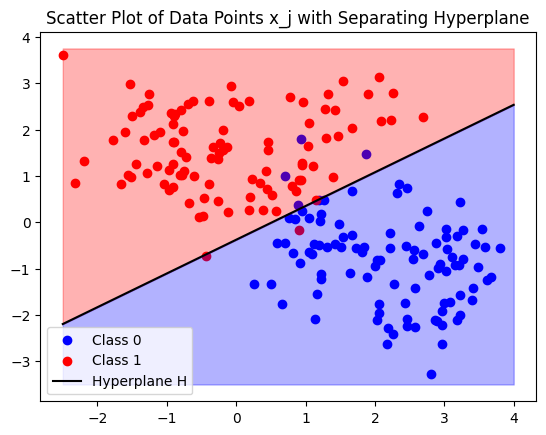

In [ ]:
# add intercept
def add_intercept(data = None):
  return np.concatenate((np.ones((data.shape[0], 1)), data), axis=1)

X = add_intercept(x)

# LLS
def LLS(data = None, values = None):
  return np.linalg.solve((data.T @ data), (data.T @ values))

alpha = LLS(X, y)

#plt
x_values = np.linspace(-2.5, 4)
y_values = (1/2 - alpha[0] - alpha[1]*x_values)/alpha[2]
plt.scatter(x[:100, 0], x[:100, 1], color = 'b', label = 'Class 0')
plt.scatter(x[100:, 0], x[100:, 1], color = 'r', label = 'Class 1')
plt.plot(x_values, y_values, 'black', label = 'Hyperplane H')
plt.fill_between(x_values, y_values, 3.75, color = 'r', alpha=0.3)
plt.fill_between(x_values, y_values, -3.5, color = 'b', alpha=0.3)
plt.title('Scatter Plot of Data Points x_j with Separating Hyperplane')
plt.legend()
plt.show()

### 1.3.1 Quantifying the misclassification error
Task 1.3. Build the so-called confusion matrix for the data and the hyperplane from task 1.2, i.e. a matrix $C$, with entries
$$C_{ij} = |\{\text{Points classified as $i$, where the real label is $j$}\}|$$
In our case this is a 2 × 2 matrix with $i, j \in \{0, 1\}$. Calculate the accuracy $\frac{\text{trace}(C)}{n}$.



In [ ]:
def confusion(points = None, coeff_est = None, real = None):
  y_hat = points @ coeff_est > 0.5 # points classified as 1?
  C = np.zeros((2, 2))
  for i in range(2):
    for j in range(2):
      C[i, j] = sum((y_hat == i) & (real == j))
  print('Confusion Matrix:')
  print(C)
  print(f'Accuracy: {np.trace(C)/len(real)*100}%')

confusion(X, alpha, y)

Confusion Matrix:
[[96.  2.]
 [ 4. 98.]]
Accuracy: 97.0%


Task 1.4. Create 10,000 test points for each of the two classes in the same way as you created the training data in step (b) of task 1.1. Evaluate the LLS classifier, which was built on the training data, on the test data and compute the confusion matrix and the accuracy of the test data. Compare your results to the ones from task 1.3.

In [ ]:
n = 10000 + 10000

# create test data and add intercept
X = add_intercept(create_data_points(n))

# evaluation of the classifier from the previous task
confusion(X, alpha, label(n))

Confusion Matrix:
[[9505.  255.]
 [ 495. 9745.]]
Accuracy: 96.25%


Our regression coefficients $\alpha$ were fitted to the training data from task 1.1, i.e. we strive for the highest accuracy when classifying the training data. This explains why the accuracy for classifying newly created data points is slightly lower in 1.4.
### 1.3.2 Our first "real" data set and Pandas
Task 1.5.

(a) Read in the Iris data set and use the data labels $y_i = 0$ for the Iris-setosa instances and $y_i = 1$ for the Iris-versicolor and Iris-virginica classes.

In [ ]:
# read in the Iris data set
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(url, header=None)

# data labels
iris_df['y'] = np.where(iris_df[4] == 'Iris-setosa', 0, 1)

a.1. Run the LLS algorithm by using only the first two dimensions of $\Omega$ in the input data, i.e. we only look at the first two features. Plot the scattered data and the separating hyperplane as in task 1.2.

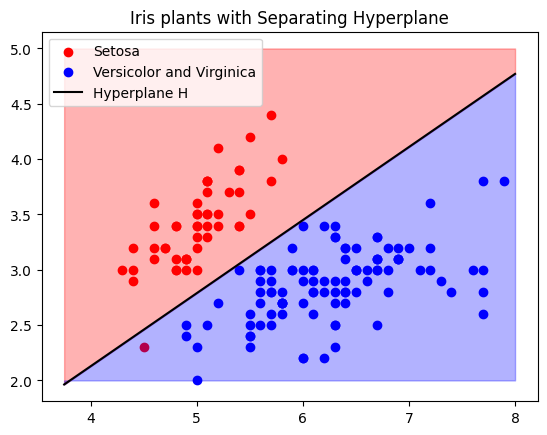

In [ ]:
# create data for lls: use only first two dimensions + add intercept
def data_two_dim():
  x = iris_df.drop([2, 3, 4, 'y'], axis = 1).values # drop all other dimensions
  y = iris_df['y']
  X = add_intercept(x) # add intercept
  return x, y, X

x, y, X = data_two_dim()

# run LLS
alpha = LLS(X, y)

#plt
x_values = np.linspace(3.75, 8)
y_values = (1/2 - alpha[0] - alpha[1]*x_values)/alpha[2]
plt.scatter(x[y == 0, 0], x[y == 0, 1], color = 'r', label = 'Setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'b', label = 'Versicolor and Virginica')
plt.plot(x_values, y_values, 'black', label = 'Hyperplane H')
plt.fill_between(x_values, y_values, 5, color = 'r', alpha = 0.3)
plt.fill_between(x_values, y_values, 2, color = 'b', alpha = 0.3)
plt.title('Iris plants with Separating Hyperplane')
plt.legend()
plt.show()

a.2. Now run the LLS algorithm by using all four features/dimensions of the input data. Compute the confusion matrix and the accuracy.

In [ ]:
def use_all_dim():
  X = np.concatenate((np.ones((len(y), 1)), iris_df.drop([4, 'y'], axis = 1).values), axis=1) # create data for lls: use all dimensions + add intercept
  alpha = LLS(X, y) # run LLS
  confusion(X, alpha, y) # confusion + accuracy

use_all_dim()

Confusion Matrix:
[[ 50.   0.]
 [  0. 100.]]
Accuracy: 100.0%


(b) Finally, run the same two steps as before, but now try to classify Iris-versicolor instances (label $y_i = 0$) against both Iris-setosa and Iris-virginica (label $y_i = 1$). What do you observe?

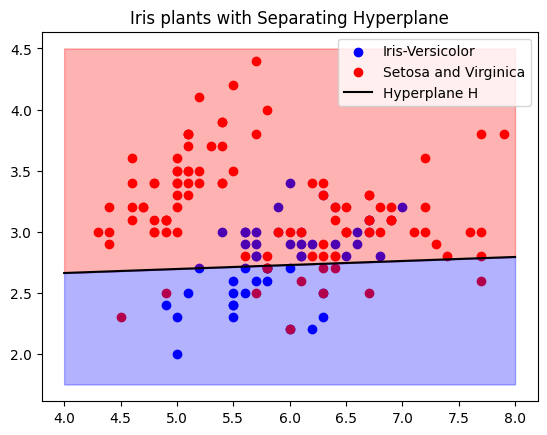

Confusion Matrix:
[[24. 14.]
 [26. 86.]]
Accuracy: 73.33333333333333%


In [ ]:
# data labels: now we want to classify whether it is the Iris-versicolor or not
iris_df['y'] = np.where(iris_df[4] == 'Iris-versicolor', 0, 1)

# b.1.
## create data for lls: use only first two dimensions + add intercept
x, y, X = data_two_dim()

## run LLS
alpha = LLS(X, y)

## plt
x_values = np.linspace(4, 8)
y_values = (1/2 - alpha[0] - alpha[1]*x_values)/alpha[2]
plt.scatter(x[y == 0, 0], x[y == 0, 1], color = 'b', label = 'Iris-Versicolor')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color = 'r', label = 'Setosa and Virginica')
plt.plot(x_values, y_values, 'black', label = 'Hyperplane H')
plt.fill_between(x_values, y_values, 4.5, color = 'r', alpha = 0.3)
plt.fill_between(x_values, y_values, 1.75, color = 'b', alpha = 0.3)
plt.title('Iris plants with Separating Hyperplane')
plt.legend()
plt.show()


# b.2.
use_all_dim()

The accuracy of our classifier crafted via LLS plummets. From the exercise's part (a), the Iris-Setosa plant seems to have distinctive characteristics that differ from the other two Iris plants, i.e. the classifier does a great job deciding whether a Versicolor plant is a Setosa plant or not (it will be classified as "not Setosa" with 100% accuracy). However, the same does not hold if our objective is to decide whether a plant is Versicolor or not as can be seen in (b), possibly bacause of shared/similar characteristics of the Versicolor and Virginica plants.
### 1.3.3 Another approach to solving the optimization problem
Task 1.6. Implement the gradient descent method and run an LLS algorithm with a gradient descent optimizer for the data from task 1.5 (a.1.). Choose $v \in \{1,10^{-1}, 10^{-2}, \dots\}$ as the largest value such that convergence is achieved. Create a plot of the value of $J$ vs. the actual iteration number. What do you observe?

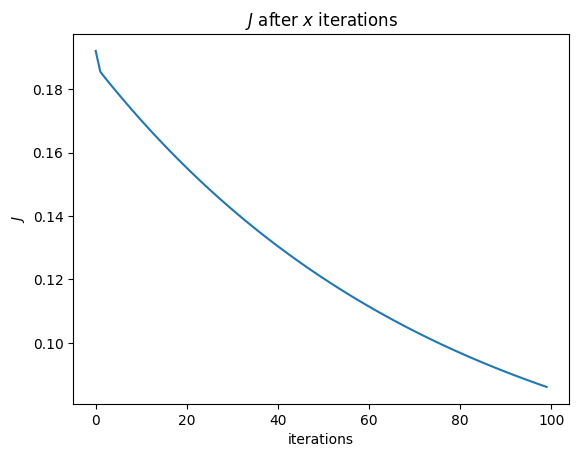

In [ ]:
def grad_desc(data = None, values = None, stepwidth = None, maxSteps = 100000, convergence_criterion = 1e-4):
  conv = 0 # indicates whether convergence is achieved
  alpha = np.zeros(data.shape[1])# initialize alpha (not so) randomly
  step = 0
  iter_J = [] # We want to store our values for J in each iteration.
  while step < maxSteps:
    grad = 2*X.T @ (X @ alpha - values)/len(values)
    alpha = alpha - stepwidth*grad
    iter_J.append(sum((X @ alpha - values)**2)/len(values))
    if np.linalg.norm(grad) < convergence_criterion:
      conv = 1
      break
    step = step + 1
  return alpha, conv, iter_J

# load data from 1.5 (a.1.)
iris_df['y'] = np.where(iris_df[4] == 'Iris-setosa', 0, 1)
x, y, X = data_two_dim()

J = grad_desc(X, y, 0.01)[2]

#plt
plt.plot(range(100), J[:100])
plt.title('$J$ after $x$ iterations')
plt.xlabel('iterations')
plt.ylabel('$J$')
plt.show()

### 1.2.3 Data normalization
Task 1.7. Normalize the data from task 1.5 (a.1.). To this end, calculate the mean $\mu_j$ and the standard deviation $\sigma_j$ for each feature $j$ (i.e. each coordinate direction $j$ of the data set) and set the $j$-th component of the $i$-th data point to
$$[x_i]_j ≡ \frac{[x_i]_j - \mu_j}{\sigma_j}.$$

In [ ]:
X = add_intercept((x - np.mean(x, axis = 0))/np.std(x, axis = 0))

Now run the gradient descent LLS algorithm on the normalized data. Again, choose $\nu$ as the largest value such that convergence is achieved. Compare the first 100 iteration steps by plotting the value of J vs. the iteration number for both the normalized and the unnormalized case. What do you observe?

In [ ]:
# Note that in task 1.6 we chose \nu = 0.01 to achieve convergence. Here we can choose \nu = 0.1 to converge even faster.
J_2 = grad_desc(X, y, 0.1)[2]
J_3 = grad_desc(X, y, 0.01)[2]

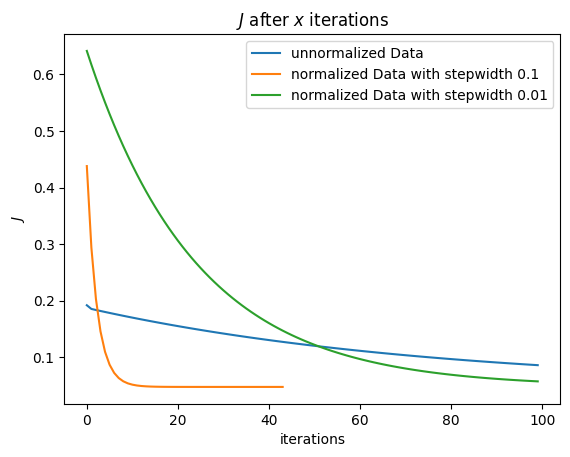

In [ ]:
#plt
plt.plot(range(100), J[:100], label = 'unnormalized Data')
plt.plot(range(len(J_2)), J_2[:len(J_2)], label = 'normalized Data with stepwidth 0.1')
plt.plot(range(100), J_3[:100], label = 'normalized Data with stepwidth 0.01')
plt.title('$J$ after $x$ iterations')
plt.xlabel('iterations')
plt.ylabel('$J$')
plt.legend()
plt.show()

Our objective function converges to 0 significantly faster with normalized data.

##1.4 $k$-NEAREST NEIGHBORS
Task 1.8. Implement the $k$-nearest neighbor algorithm (Hint: Have a look at numpy’s argpartition function). There are many possible ways to calculate the pairwise distances between data sets. For instance, you can use the scipy.spatial.distance library. Run the algorithm with $k = 1, k = 15$ and $k = 30$ and calculate the confusion matrix and the accuracy for the data set from task 1.1 (using it as training and test data set). Make a scatter plot of the data and plot the separation level set, i.e. the contour of $\text{nearNeighk}_k(x) = \frac{1}{2}$.

In [ ]:
import scipy.spatial.distance as ssd
def knn(k = None, x_train = None, y_train = None, x_test = None):
  distance = ssd.cdist(x_test, x_train)
  nearest_neighbors = np.argpartition(distance, k)[:, :k]
  return np.where(np.sum(y_train[nearest_neighbors], axis = 1)/k < 1/2, 0, 1)

def confusion_2(y_hat = None, real = None):
  C = np.zeros((2, 2))
  for i in range(2):
    for j in range(2):
      C[i, j] = sum((y_hat == i) & (real == j))
  acc = np.trace(C)/len(real)*100
  return C, acc

# load data from 1.1
n = 200
x = create_data_points(n)
y = label(n)

for k in (1, 15, 30):
  h = confusion_2(knn(k, x, y, x), y)
  print(f'Confusion Matrix for k = {k}:')
  print(h[0])
  print(f'Accuracy for k = {k}: {h[1]}%')

Confusion Matrix for k = 1:
[[100.   0.]
 [  0. 100.]]
Accuracy for k = 1: 100.0%
Confusion Matrix for k = 15:
[[96.  2.]
 [ 4. 98.]]
Accuracy for k = 15: 97.0%
Confusion Matrix for k = 30:
[[97.  2.]
 [ 3. 98.]]
Accuracy for k = 30: 97.5%


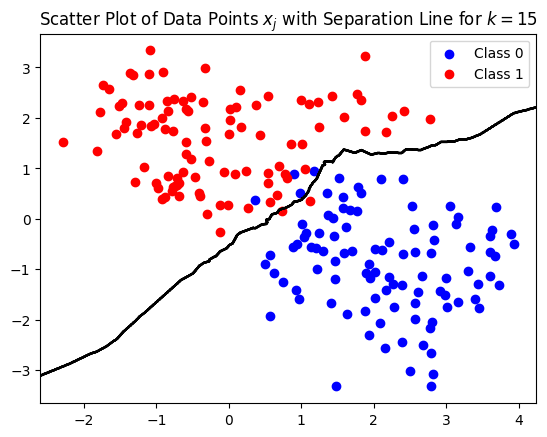

In [ ]:
#plt with plotted separation line for k = 15
plt.scatter(x[:100, 0], x[:100, 1], color = 'b', label = 'Class 0')
plt.scatter(x[100:, 0], x[100:, 1], color = 'r', label = 'Class 1')
plt.title('Scatter Plot of Data Points $x_j$ with Separation Line for $k = 15$')
x_left, x_right = plt.xlim()
y_left, y_right = plt.ylim()

#create many (x,y)
h = 1000
xx, yy = np.meshgrid(np.linspace(x_left, x_right, h), np.linspace(y_left, y_right, h))
graph = np.concatenate((np.reshape(xx.ravel(), (h**2, 1)), np.reshape(yy.ravel(), (h**2, 1))), axis = 1)

#separation line for k = 15
plt.contour(xx, yy, knn(15, x, y, graph).reshape(xx.shape), colors = 'black')

plt.legend()
plt.show()

Task 1.9. Let us test how the algorithm performs for every possible $k$.

(a) Run the $k$-nearest neighbors algorithm for the data from task 1.1 for all $k = 1,…, 200$ and store the accuracy for each $k$.

In [ ]:
acc = []
for k in range(1, 200):
  acc.append(confusion_2(knn(k, x, y, x), y)[1])

(b)  Do the same thing as in step (a) but now use the data created in task 1.4 as test data.

In [ ]:
n = 10000 + 10000
x_test = create_data_points(n)
y_test = label(n)

acc_4 = []
for k in range(1, 200):
  acc_4.append(confusion_2(knn(k, x, y, x_test), y_test)[1])

(c) Plot the accuracies from steps (a) and (b) vs. the value of $k$. What do you observe?

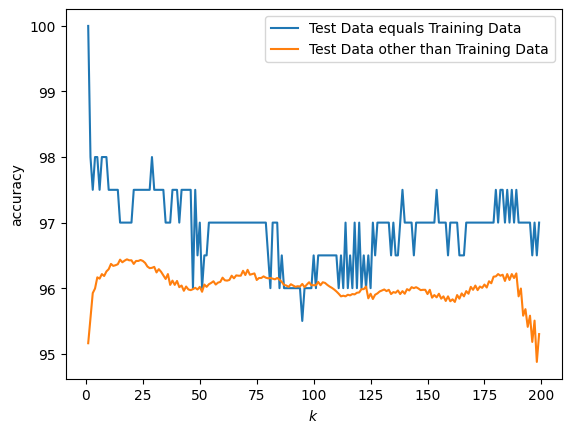

In [ ]:
plt.plot(range(1, 200), acc, label = 'Test Data equals Training Data')
plt.plot(range(1, 200), acc_4, label = 'Test Data other than Training Data')
plt.xlabel('$k$')
plt.ylabel('accuracy')
plt.legend()
plt.show()

The accuracy rate is predominantly higher when we apply our classifier to training data again, although with significantly greater volatility due to the fewer data points.